# POE user analyzing project
###### **Data reference and questions are here: https://www.kaggle.com/datasets/gagazet/path-of-exile-league-statistic**

---
Hi, I'm Angela. 😊 I'm a novice in data analysis.  I'm a novice in data analysis. I'm interested in the video games, mobility, culture, and content industry. I hope to become a data scientist with anomaly detection and anti-cheating. I hope that my analysis will have a positive impact on the world at least a little bit.  

This is my first Kaggle-data analyzing project on my own. I played(?) with this data for almost a month or more freely, and I finish it to start to answer these questions partially. Finally, I can close the analysis joyfully.
I analyzed this data set with my thoughts and what I learned (as if I were a game analyst 😆).  
_ps. English may seem a little awkward because it is not my first language. I'm sorry. And I used the word 'average' more than the word 'mean' because I wanted to communicate more clearly in my hectic writing. 'mean' is so mean to 'average', 'mean' means 'mean' and... just joking._ 🤪

---
##### **Questions for participants**

1. A total number of players in each division, usage of each class in descending order.
2. Some of the players streaming their game (twitch column). Do they play better than people, who does not?
3. Predict chance to be at top 30 in each division, if we are Necromancer. With and without stream.
4. Average number of finished challanges for each division, show division with highest and lowest average challanges.
5. Show dependency between level and class of died characters. Only for HC divisions.


## Importin Data and Libraries
---

In [1]:
import pandas as pd
import numpy as np

import time as time
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

np.random.seed(0)
tf.random.set_seed(0)

# version check
print(sns.__version__)
print(pd.__version__)
print(np.__version__)
print(tf.__version__)
print(keras.__version__)

data = pd.read_csv("poe_stats.csv")

0.11.2
1.4.1
1.22.4
2.9.1
2.9.0


In [2]:
df = data
df.head(10)

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder
0,1,False,False,Tzn_NecroIsFineNow,100,Necromancer,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,4250334444,TheTzn,40,thetzn,Harbinger
1,1,False,False,RaizNeverFirstQT,100,Necromancer,8f3216db5ac9106c287a834731aafc83c387138f28fc45...,4250334444,RaizQT,22,raizqt,SSF Harbinger HC
2,1,False,False,GucciStreamerAdvantage,100,Necromancer,c6ec2dae3855c551e0597c06ef2da06fbb5512487ded7f...,4250334444,GucciPradas,35,guccipradas,Hardcore Harbinger
3,1,False,False,ChiroxPrime,100,Slayer,c861372da792be0b22c45bf437ccd58437c52e9455e0bf...,4250334444,Chiroxun,26,NaN,SSF Harbinger
4,2,False,False,Cool_NecroIsFineNow,100,Deadeye,24ae924ceed7989ef3d3d6772612832bb467a6094352c7...,4250334444,cooltail,22,NaN,Harbinger
5,2,False,False,SteelStreamerAdvantage,100,Deadeye,51acb8e6fac3cfaa7ff848151dad01b0a6f350e7525543...,4250334444,Steelmage,37,steelmage202,Hardcore Harbinger
6,2,False,False,Grom_WhyGodThreeCmWhy,100,Gladiator,5d8b80b2bdd30f3dba1036a6791187562758935e8d4723...,4250334444,rocklegend,22,gromick,SSF Harbinger HC
7,2,False,False,beobio_capitan,100,Inquisitor,65c58f9b186e1fbe9f927484f3f178cdb9ee0dc2427289...,4250334444,TishaVosemsot,40,beobio,SSF Harbinger
8,3,False,False,Rami_The_Negromaniac,100,Necromancer,00c0030fc548cc4c0d804564f8fb356610044b7e6d484f...,4250334444,rami1337,40,rami1337,Harbinger
9,3,False,False,FutonBlewAway,100,Raider,46e56572ff6e403f45fac597240e13e9af225f06ca4e52...,4250334444,pleaGRC,40,NaN,SSF Harbinger


## Data summary

In [3]:
# options about float

pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,rank,level,experience,challenges
count,"59,776.00","59,776.00","59,776.00","59,776.00"
mean,"7,495.37",85.42,"1,825,786,027.36",25.76
std,"4,330.18",11.29,"1,094,747,934.61",8.44
min,1.00,53.00,"77,909,816.00",4.00
25%,"3,745.00",78.00,"777,469,746.25",19.00
50%,"7,492.00",90.00,"1,934,009,687.00",25.00
75%,"11,247.00",95.00,"2,876,116,901.00",33.00
max,"15,000.00",100.00,"4,250,334,444.00",40.00


In [4]:
df.describe(include = 'object')

,name,class,id,account,twitch,ladder
count,59776,59776,59776,59776,16300,59776
unique,58286,26,59776,37123,9613,4
top,_Flic_,Berserker,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,chuz101,thespunkylobster,SSF Harbinger
freq,14,8711,1,30,18,14981


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59776 entries, 0 to 59775
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        59776 non-null  int64 
 1   dead        59776 non-null  bool  
 2   online      59776 non-null  bool  
 3   name        59776 non-null  object
 4   level       59776 non-null  int64 
 5   class       59776 non-null  object
 6   id          59776 non-null  object
 7   experience  59776 non-null  int64 
 8   account     59776 non-null  object
 9   challenges  59776 non-null  int64 
 10  twitch      16300 non-null  object
 11  ladder      59776 non-null  object
dtypes: bool(2), int64(4), object(6)
memory usage: 4.7+ MB


# 1. rankers by ladder
---
##### Q1. A total number of players in each division, usage of each class in descending order.

First I understood that question and wanted to know about each class ratio in each ladder. And it is true maybe.  
(But... I think this question has to be more clear about 'players'. Because there're quite many users who have multiple characters which are on ranked.)  

So I categorized the meaning of 'players' as characters and users. 

## 1-1. id(character) and users in each ladder

In [6]:
# id, rank, account unique numbers

modes = ['Harbinger', 'Hardcore Harbinger', 'SSF Harbinger', 'SSF Harbinger HC']

for i in modes:
    print("ladder:", i)
    print("number of unique id:", df[df['ladder'] == i]['id'].nunique())
    print("number of unique rank:", df[df['ladder'] == i]['rank'].nunique())
    print("number of unique account:", df[df['ladder'] == i]['account'].nunique())
    print("max value of the rank:", df[df['ladder'] == i]['rank'].max())
    print('---------------------------------')

ladder: Harbinger
number of unique id: 14918
number of unique rank: 14918
number of unique account: 13160
max value of the rank: 15000
---------------------------------
ladder: Hardcore Harbinger
number of unique id: 14905
number of unique rank: 14905
number of unique account: 9020
max value of the rank: 15000
---------------------------------
ladder: SSF Harbinger
number of unique id: 14981
number of unique rank: 14981
number of unique account: 10214
max value of the rank: 15000
---------------------------------
ladder: SSF Harbinger HC
number of unique id: 14972
number of unique rank: 14972
number of unique account: 6374
max value of the rank: 15000
---------------------------------


## 1-2. Answer: characters number of each class in each ladder

We can all class and ladder mode put together in one data frame for analysis, and also make them separately to see more comfortable.  
First, we can compare the number of specific classes with other ladders easily.  
In the second method, we can compare the number of the specific ladder with other classes.

In [7]:
# pivot by class and ladder to one Data frame

df_cha_bylad = df.pivot_table(values = 'account', index = 'ladder', columns = 'class', aggfunc = 'count', margins=True, margins_name="total", fill_value = 0)

# transpose to make class as row
df_cha_bylad = df_cha_bylad.sort_values(ascending = False, by = 'ladder').transpose()
df_cha_bylad.reset_index(drop = False, inplace = True)

# drop 'index = 26 'total' row '
df_cha_bylad.drop(index = 26, inplace = True)
df_cha_bylad

ladder,class,total,SSF Harbinger HC,SSF Harbinger,Hardcore Harbinger,Harbinger
0,Ascendant,3754,865,1000,1149,740
1,Assassin,679,225,274,72,108
2,Berserker,8711,1644,2290,2064,2713
3,Champion,1216,338,262,490,126
4,Chieftain,2130,693,456,690,291
5,Deadeye,719,193,280,167,79
6,Duelist,65,55,10,0,0
7,Elementalist,1326,432,541,160,193
8,Gladiator,4900,1576,1320,1356,648
9,Guardian,1177,101,66,661,349


In [8]:
# pd.crosstab(values = df['id'], columns = df['ladder'], index = df['class'], 
#                aggfunc = 'count', margins=True, margins_name="total", )

In [9]:
# if you want to see it seperated by ladder

# Harbinger
df[df['ladder'] == 'Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)

class
Pathfinder      3428
Berserker       2713
Raider          1943
Slayer          1706
Necromancer     1207
Ascendant        740
Gladiator        648
Inquisitor       559
Guardian         349
Chieftain        291
Trickster        211
Elementalist     193
Juggernaut       187
Saboteur         177
Occultist        151
Champion         126
Assassin         108
Hierophant       102
Deadeye           79
Name: id, dtype: int64

In [10]:
# Harbinger HC

df[df['ladder'] == 'Hardcore Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)

class
Necromancer     2099
Berserker       2064
Gladiator       1356
Slayer          1343
Ascendant       1149
Raider           895
Trickster        834
Inquisitor       828
Chieftain        690
Juggernaut       672
Guardian         661
Champion         490
Pathfinder       416
Hierophant       398
Saboteur         304
Occultist        301
Deadeye          167
Elementalist     160
Assassin          72
Ranger             4
Marauder           1
Scion              1
Name: id, dtype: int64

In [11]:
# SSF Harbinger 

df[df['ladder'] == 'SSF Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)

class
Berserker       2290
Necromancer     1716
Raider          1486
Gladiator       1320
Slayer          1301
Ascendant       1000
Trickster        955
Inquisitor       952
Hierophant       557
Elementalist     541
Chieftain        456
Juggernaut       437
Saboteur         407
Occultist        367
Deadeye          280
Assassin         274
Champion         262
Pathfinder       236
Guardian          66
Witch             21
Ranger            13
Shadow            10
Duelist           10
Marauder          10
Scion              8
Templar            6
Name: id, dtype: int64

In [12]:
# SSF Harbinger HC

df[df['ladder'] == 'SSF Harbinger HC'].groupby(by = 'class').count()['id'].sort_values(ascending = False)

class
Necromancer     2055
Berserker       1644
Gladiator       1576
Slayer          1135
Trickster       1058
Inquisitor      1052
Ascendant        865
Raider           826
Juggernaut       734
Chieftain        693
Hierophant       668
Elementalist     432
Occultist        413
Saboteur         393
Champion         338
Assassin         225
Deadeye          193
Pathfinder       159
Guardian         101
Witch             98
Marauder          84
Templar           65
Duelist           55
Scion             43
Shadow            36
Ranger            31
Name: id, dtype: int64

## 1-3. (plus) characters ratio of each class in each ladder (descending order)

In [13]:
# Harbinger
df[df['ladder'] == 'Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)  / df[df['ladder'] == 'Harbinger'].shape[0] * 100

class
Pathfinder     22.98
Berserker      18.19
Raider         13.02
Slayer         11.44
Necromancer     8.09
Ascendant       4.96
Gladiator       4.34
Inquisitor      3.75
Guardian        2.34
Chieftain       1.95
Trickster       1.41
Elementalist    1.29
Juggernaut      1.25
Saboteur        1.19
Occultist       1.01
Champion        0.84
Assassin        0.72
Hierophant      0.68
Deadeye         0.53
Name: id, dtype: float64

In [14]:
# HC Harbinger
df[df['ladder'] == 'Hardcore Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False) / df[df['ladder'] == 'Hardcore Harbinger'].shape[0] * 100

class
Necromancer    14.08
Berserker      13.85
Gladiator       9.10
Slayer          9.01
Ascendant       7.71
Raider          6.00
Trickster       5.60
Inquisitor      5.56
Chieftain       4.63
Juggernaut      4.51
Guardian        4.43
Champion        3.29
Pathfinder      2.79
Hierophant      2.67
Saboteur        2.04
Occultist       2.02
Deadeye         1.12
Elementalist    1.07
Assassin        0.48
Ranger          0.03
Marauder        0.01
Scion           0.01
Name: id, dtype: float64

In [15]:
# SSF Harbinger
df[df['ladder'] == 'SSF Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False) / df[df['ladder'] == 'SSF Harbinger'].shape[0] * 100

class
Berserker      15.29
Necromancer    11.45
Raider          9.92
Gladiator       8.81
Slayer          8.68
Ascendant       6.68
Trickster       6.37
Inquisitor      6.35
Hierophant      3.72
Elementalist    3.61
Chieftain       3.04
Juggernaut      2.92
Saboteur        2.72
Occultist       2.45
Deadeye         1.87
Assassin        1.83
Champion        1.75
Pathfinder      1.58
Guardian        0.44
Witch           0.14
Ranger          0.09
Shadow          0.07
Duelist         0.07
Marauder        0.07
Scion           0.05
Templar         0.04
Name: id, dtype: float64

In [16]:
# SSF Harbinger HC
df[df['ladder'] == 'SSF Harbinger HC'].groupby(by = 'class').count()['id'].sort_values(ascending = False) / df[df['ladder'] == 'SSF Harbinger HC'].shape[0] * 100

class
Necromancer    13.73
Berserker      10.98
Gladiator      10.53
Slayer          7.58
Trickster       7.07
Inquisitor      7.03
Ascendant       5.78
Raider          5.52
Juggernaut      4.90
Chieftain       4.63
Hierophant      4.46
Elementalist    2.89
Occultist       2.76
Saboteur        2.62
Champion        2.26
Assassin        1.50
Deadeye         1.29
Pathfinder      1.06
Guardian        0.67
Witch           0.65
Marauder        0.56
Templar         0.43
Duelist         0.37
Scion           0.29
Shadow          0.24
Ranger          0.21
Name: id, dtype: float64

## 1-4. Visualization

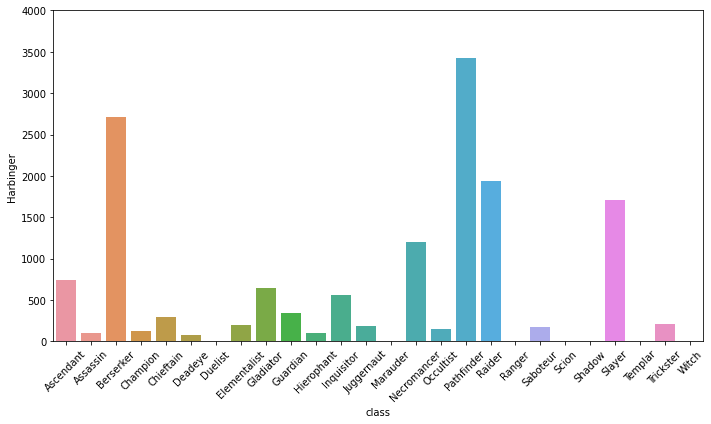

In [17]:
# if you want to see as seperated by ladder (case when 'Harbinger')

plt.subplots(figsize = (10, 6))

plt.xlabel('Class name')
plt.ylabel('Number of id')
plt.ylim(bottom = 0, top = 4000)
plt.xticks(rotation=45, fontsize=10)

sns.barplot(x = 'class', y = 'Harbinger', data = df_cha_bylad)
plt.tight_layout()
plt.show()

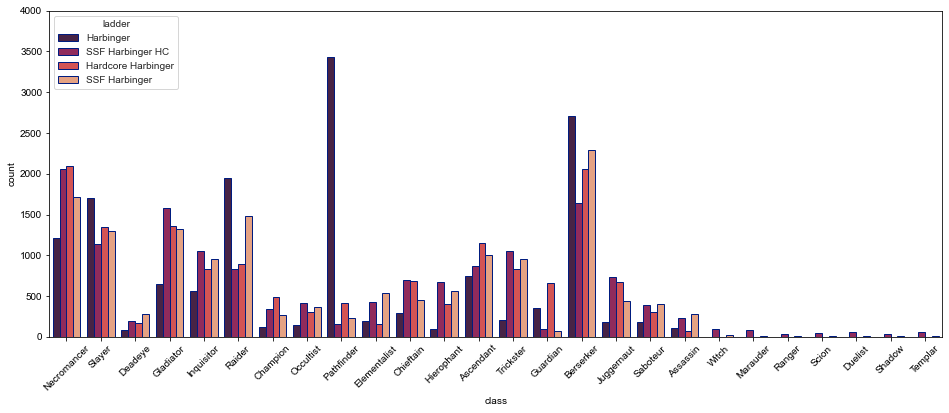

In [18]:
# if you want to see all of them

plt.rcParams["figure.figsize"] = (16, 6)
plt.xlabel('Class name')
plt.ylabel('Number of id')
plt.ylim(bottom = 0, top = 4000)
plt.xticks(rotation=45, fontsize=10)
sns.set_style('whitegrid')
ax = sns.countplot(data = df, x = 'class',
              palette="rocket", edgecolor=sns.color_palette("dark", 1), hue = 'ladder') 

## 1-5. Result

There are some preferred classes in each ladder.  
In Harbinger, the most common mode, Pathfinder is the most one. And Necromancer is the most preferred in Harbinger hardcore mode. (Berserk was on the same level.)  
In SSF Harbinger, the solo mode, the most picked one is Berserker and Necromancer is also preferred too.  
In SSF Harbinger hardcore, the most one is Necromancer and Berserker is also preferred.  


I want to add this, this is a result of the preference for class division in each ladder.  
X category means pre-class, like 'witch', 'Duelist', 'Templar' etc.  
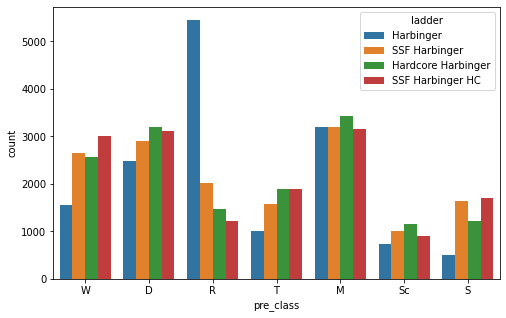

Necromancer or Berserker are preferred in other modes, but Pathfinder is the most preferred class, especially Harbinger.  
We may have to consider that all of them(Necromancer and Berserker and Pathfinder) are one-stat classes.  
And Each class is among the Intelligence, Strength, Dexterity stat.  

# 2. Are streamers better or not?
---
##### Q2. Some of the players streaming their games (twitch column). Do they play better than people who do not stream?

1. We have to set the standard of 'play better' means, so I treat the rank of characters to the 'better play'. Maybe there are more criteria like ranking of 'exp' or 'level', 'challenge' contrasts.
But I just used the **rank** because they are ranked players, they are already skilled enough to base their rankings on the number of challenges or levels. In addition, it is because many variables affect classes, parties, items, and skill trees to compare them on other criteria other than game modes, and we cannot know everything in detail.

2. And there are some cases where one twitch streamer has multiple accounts or characters. And also, one user has multiple characters on a rank chart. (I discovered it when I analyze the dataset before this project.) So I assumed that one account or one twitch id means one user(one twitch includes multiple accounts).

3. And there're some missing rank values in each ladder. When I analyzed the data personally, I substituted the missing data by updating it to rank only the data we have. But, anyway, I used the original rank in this analysis.

4. Plus, does rank have meaning only when they exist in an integer? My words mean, I wonder which is more accurate the average of one user's rank and the median of one user's rank. I expect it's better when the number of the data in one user's rank is above 30 or more. But the reality was not, so I used both of them in this analysis.  

5. sequence
    1. normally get the average from all dataframe
    2. get the average from each player(user)'s average rank
    3. get the average from each player(user)'s median rank
    4. statistical significance test

In [19]:
df['twitch'].describe()

count                16300
unique                9613
top       thespunkylobster
freq                    18
Name: twitch, dtype: object

In [20]:
# Twitch streaming users
df[df['twitch'].isna() == True].describe(include = 'object')

,name,class,id,account,twitch,ladder
count,43476,43476,43476,43476,0,43476
unique,42342,26,43476,27505,0,4
top,_Flic_,Berserker,c861372da792be0b22c45bf437ccd58437c52e9455e0bf...,chuz101,NaN,SSF Harbinger
freq,14,6372,1,30,NaN,12320


In [21]:
# Not streaming users
df[df['twitch'].isna() == False].describe(include = 'object')

,name,class,id,account,twitch,ladder
count,16300,16300,16300,16300,16300,16300
unique,15946,26,16300,9618,9613,4
top,Cya,Berserker,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,TheSpunkyLobster,thespunkylobster,Hardcore Harbinger
freq,8,2339,1,18,18,5452


In [22]:
# you can see how much missing values in rank are there by ladder

print(df[df['ladder'] == 'Harbinger']['rank'].nunique())
print(df[df['ladder'] == 'Hardcore Harbinger']['rank'].nunique())
print(df[df['ladder'] == 'SSF Harbinger']['rank'].nunique())
print(df[df['ladder'] == 'SSF Harbinger HC']['rank'].nunique())

14918
14905
14981
14972


## 2-1. dividing data

Let's divide the dataset as whether 'twitch' user or not.  
And divide them by person(twitch unique value is first in the twitch column)'s average.  


In [23]:
# each id's rank
df_twt = df[df['twitch'].isna() == False]
df_twt_non = df[df['twitch'].isna() == True]

In [24]:
# each user's mean rank
# grouping by player and get the 'average' rank of each player streaming on twitch or not
df_twt_mean = df_twt.pivot_table(index = 'twitch', values = 'rank', aggfunc = 'mean')
df_twt_non_mean = df_twt.pivot_table(index = 'account', values = 'rank', aggfunc = 'mean')

In [25]:
# each user's median rank
# grouping by player and get the 'median' rank of each player streaming on twitch or not
df_twt_med = df_twt.pivot_table(index = 'twitch', values = 'rank', aggfunc = 'median')
df_twt_non_med = df_twt.pivot_table(index = 'account', values = 'rank', aggfunc = 'median')

## 2-2. comparing average by cases
### 2-2-1. normal average of rank simply

normally get the average from all dataframe

In [26]:
# twtich streamers and not streaming users's rank average of each 'id'
print(df_twt['rank'].mean())
print(df_twt_non['rank'].mean())

7101.554355828221
7643.018308952065


In [27]:
print(df_twt['rank'].median())
print(df_twt_non['rank'].median())

6960.5
7684.0


### 2-2-2. average rank by account and get average

get the average from each player(user)'s average rank

In [28]:
# get the average rank of each player's average rank
print(np.average(df_twt_mean))
print(np.average(df_twt_non_mean))

7479.202758592788
7479.1660218046945


In [29]:
# check the median rank of each player's average rank
print(np.median(df_twt_mean))
print(np.median(df_twt_non_mean))

7425.0
7425.5


### 2-2-3. median rank of each player and get average

get the average from each player(user)'s median rank

In [30]:
# get the average rank of each player's median rank
print(np.average(df_twt_med))
print(np.average(df_twt_non_med))

7435.413606574431
7435.166874610106


In [31]:
# get the median rank of each player's median rank
print(np.median(df_twt_med))
print(np.median(df_twt_non_med))

7395.5
7396.25


## 2-4. Visualizing each value

In [32]:
x = ['Arithmetic mean - Twitch_user', 'Arithmetic mean - normal_user', 
     'Mean of rank mean - Twitch_user', 'Mean of rank mean - normal_user', 
     'Mean of rank median - Twitch_user', 'Mean of rank median - normal_user']

In [33]:
y = [df_twt['rank'].mean(),
df_twt_non['rank'].mean(),
df_twt_mean['rank'].mean(),
df_twt_non_mean['rank'].mean(),
df_twt_med['rank'].mean(),
df_twt_non_med['rank'].mean()]

In [34]:
df_twt['rank']

0            1
1            1
2            1
5            2
6            2
         ...  
59761    14997
59764    14998
59768    14999
59771    14999
59774    15000
Name: rank, Length: 16300, dtype: int64

In [35]:
y

[7101.554355828221,
 7643.018308952065,
 7479.202758592788,
 7479.1660218046945,
 7435.413606574431,
 7435.166874610106]

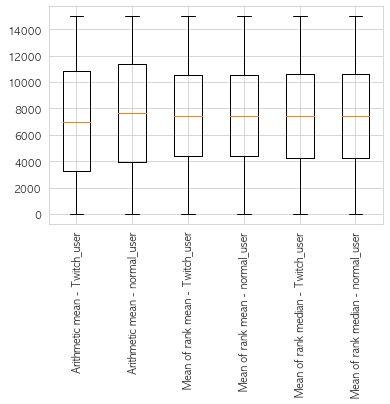

In [36]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (6, 4)
plt.boxplot([df_twt['rank'], df_twt_non['rank'], 
             df_twt_mean['rank'], df_twt_non_mean['rank'],
            df_twt_med['rank'], df_twt_non_med['rank']])  
plt.xticks(range(1,7), x, rotation = 90)
plt.show()

## 2-5. Independent sample t-test: Statistical significance

The T-test is a test about a statistical comparison of the means of two independent samples, as you know.  
_I don't think the statistical significance is not significant for this, especially with little size data. The data size is so little so we can't discuss Gaussian distribution or etc. But I think it's meaningful just to check even if it's not used somewhere._

"This test assumes that the populations have identical variances by default.". If they have a significant difference in group average, the values tell us. 

What I was wondering about was which one I have to use among these, df_twt, avg_twt, med_twt.  
First, I think the df_twt and df_twt_non have a critical problem in that there are multiple characters a single user has. It can't be a real answer to the question of meaning(intention).
Second, the average of each player(not single character single user) rank has problems also. It can't convince that itself represents the user. 
Third, I think the median is not bad but there is a tendency to add or subtract the existence of other details.

I used the second one(average of each player) but, I would be grateful if I can get advice about this. 😚

### 2-5-1. variances checking

In [37]:
# The numpy float print setting is dead X-(
import numpy as np
np.set_printoptions(precision=5, floatmode = 'fixed')

In [38]:
# variance checking

print("variances in whole dataframe: {}, {}".format(np.var(df_twt['rank']), np.var(df_twt_non['rank'])))
print("variances in the rank mean by account: {}, {}".format(np.var(df_twt_mean), np.var(df_twt_non_mean)))
print("variances in the rank median by account: {}, {}".format(np.var(df_twt_med), np.var(df_twt_non_med)))

variances in whole dataframe: 19303429.56974483, 18462760.2480317
variances in the rank mean by account: rank   15,190,904.77
dtype: float64, rank   15,195,802.16
dtype: float64
variances in the rank median by account: rank   15,972,641.27
dtype: float64, rank   15,974,673.08
dtype: float64


### 2-5-2. normality test: KS test 


In [39]:
from scipy.stats import *
print(kstest(df_twt['rank'], 'norm'))
print(kstest(df_twt_non['rank'], 'norm'))
print('')
print(kstest(df_twt_mean['rank'], 'norm'))
print(kstest(df_twt_non_mean['rank'], 'norm'))
print('')
print(kstest(df_twt_med['rank'], 'norm'))
print(kstest(df_twt_non_med['rank'], 'norm'))

KstestResult(statistic=0.9994775312121547, pvalue=0.0)
KstestResult(statistic=0.9998763239739181, pvalue=0.0)

KstestResult(statistic=0.9998959742003222, pvalue=0.0)
KstestResult(statistic=0.9998960282790279, pvalue=0.0)

KstestResult(statistic=0.9998959742003222, pvalue=0.0)
KstestResult(statistic=0.9998960282790279, pvalue=0.0)


### 2-5-3. Considering Homogeneity of Variance Test

In [40]:
print(levene(df_twt['rank'], df_twt_non['rank']))
print(bartlett(df_twt['rank'], df_twt_non['rank']))
print('')
print(levene(df_twt_mean['rank'], df_twt_non_mean['rank']))
print(bartlett(df_twt_mean['rank'], df_twt_non_mean['rank']))
print('')
print(levene(df_twt_med['rank'], df_twt_non_med['rank']))
print(bartlett(df_twt_med['rank'], df_twt_non_med['rank']))

LeveneResult(statistic=22.271981900489976, pvalue=2.3716901628493167e-06)
BartlettResult(statistic=11.850947768416344, pvalue=0.0005763200659926761)

LeveneResult(statistic=0.00040361652506501846, pvalue=0.983971618548424)
BartlettResult(statistic=0.00024964374952357447, pvalue=0.9873938537758158)

LeveneResult(statistic=0.0002992858445764835, pvalue=0.9861975608831015)
BartlettResult(statistic=3.885386317155406e-05, pvalue=0.9950265889794934)


```
#p-value가 유의수준 0.05보다 크기 때문에 귀무가설을 기각하지 않는다
#따라서 두 집단의 데이터는 등분산성을 만족한다고 볼 수 있음. 
#등분산성을 만족하지 못하는 2개의 그룹에 대한 ttest_ind()에는 equal_var=False 옵션을 추가.
```

The p-value is not under 0.05(except in the case of all id's rank at Bartlett's test), so we can say that they have homogeneity of variance.  
And I checked the case of all id's rank by setting the parameter `'equal_variance'` to `True` and `False` both.

### 2-5-4.  t-test_indepedance()

Do t-test with Twitch streamers and not streaming players. 

In [41]:
print('# Just simply comparing the rank average')
print(ttest_ind(df_twt['rank'], df_twt_non['rank'], equal_var = True))
print(ttest_ind(df_twt['rank'], df_twt_non['rank'], equal_var = False))
print('# If we compare the rank average= by account(player)')
print(ttest_ind(df_twt_mean['rank'], df_twt_non_mean['rank'], equal_var = True))
print('# If we compare the rank =medium= by account(player)')
print(ttest_ind(df_twt_med['rank'], df_twt_non_med['rank'], equal_var = True))

# Just simply comparing the rank average
Ttest_indResult(statistic=-13.636081539111808, pvalue=2.8271000933615483e-42)
Ttest_indResult(statistic=-13.498655643209066, pvalue=2.1307871650784414e-41)
# If we compare the rank average= by account(player)
Ttest_indResult(statistic=0.0006534655435172884, pvalue=0.9994786167475699)
# If we compare the rank =medium= by account(player)
Ttest_indResult(statistic=0.004280274013197037, pvalue=0.996584890278238)


The null hypothesis is selected because the p-value is greater than 0.05.  
That is, statistically, the difference between the two groups is meaningless.  

##### Confidence interval 

_code reference: https://jae-eun-ai.tistory.com/48_

In [42]:
from numpy import array, mean
from scipy.stats import sem, t
def mean_confidence_interval(data, confidence=.95):
    a = 1.0 * array(data)
    n = len(a)
    m,se = mean(a),sem(a)
    h = se*t._ppf((1 + confidence) / 2, n-1)
    return m, m-h, m+h

mean_confidence_interval(df_twt['rank'])

(7101.554355828221, 7034.098896993528, 7169.009814662913)

In [43]:
mean_confidence_interval(df_twt_non['rank'])

(7643.018308952065, 7602.626927978956, 7683.4096899251745)

## Result: Answer is "Well...No..."

_I don't know how to make it better. I think it would be better if I could improve my ability to name 'variables'. XD_

We can see their average rank of them by various methods. There's a difference in numbers obviously between the Twitch streamers and the non-streaming players.  

But I'd like to say 'no'. It's not about the p-value. It must need bigger or more detailed data if we discuss this, I think. 

# 3. A case when we were Necromancer
---
##### Q3. Predict the chance to be in the top 30 in each division, if we are Necromancer. With and without stream.

Actually, I don't know exactly what 'stream' means, but I think it would be twitch streaming. So, I define it as all Necromancer characters and Necromancer characters with twitch streaming.  
In this case, we can think of the question like this:  
    1. simply get the percentage of Necromancer in the top 30 by ladder 
    2. get the percentage of Necromancers in the top 30 among the same classes by ladder
    2. make a model with 'rank', 'class', 'ladder', 'twitch' columns and predict.
 

##### Before the analysis, I should clarify this thing, meaning of each analysis (get numbers). This is very important I think.
I thought about these things partially, what we can do with data, how, and the meaning of it, and the flaws.  
I used the word 'hypothesis', which means when we use specific methods(values) for solving the problem correctly.  

> In `3-1`, I got a percentage between classes in the top 30 characters.  
This is just the percentage of classes in the top 30.  
It means, we can answer what classes are in the top 30.  
When we use this one, we need a hypothesis; we're so good that we can compete with the top 30 characters and out of the top 30 characters are no match for us. It's like a setting of a **competition between classes in the top 30**.  
And I think when we use this, it's necessary for comparing the percentage of classes, in the top 30 ranks and around all ranks.  

> I think top30 means pilots' league who is really good playing.  
So in `3-2-1`, I got a percentage of the top 30 Necromancers among 'all Necromancers'.  
This is divided top 30 Necromancers numbers by all Necromancers numbers.  
It means, we can answer how many characters are playing best among all Necromancers.  
In other words, when the number of characters in each job is the same, you can see how many top rankers there are in each job.
And in other classes, I got the same ratio (`3-2-3`).  
Because of the reason that each class has a different number of rankers so we can't simply compare like `3-1`. In the case of the question, I think we should compare the case of 'choice of class', rather than just the top 30.  
The problem is, that this case needs a hypothesis; **all the classes have the same performance** and all of the pilots are almost equal in ability. (I was sure that everyone felt that this question assumed that all pilots are almost equally good at it.)   
Furthermore, it is seriously affected by character numbers who are out of the rank 30.  
I thought this method is most appropriate for the question and the probability can be drawn by comparing each percentage of classes.  
Thus this method isn't perfect also, for solving the problem.  

> In `3-2-2`, I got the percentage of the top 30 Necromancers among 'all characters'.  
This is divided top 30 Necromancers numbers by all Necromancers numbers.  
It means, we can answer how much Necromancer characters are playing best in all characters.  
It seems worth it. But this method allows us to know **the best Necromancer percentages** except for comparison problems.  
I think it's not appropriate to solve a problem on the assumption that 'if' we are a necromancer.  
It needs a hypothesis; 
 
 
##### Before the steps, check the 'rank' column whether it includes null or not in 30. 

In [44]:
# check the rank number in each ladder whether there is a null or not. 

df[df['rank']<=30].groupby('ladder')['rank'].nunique()

ladder
Harbinger             30
Hardcore Harbinger    30
SSF Harbinger         30
SSF Harbinger HC      30
Name: rank, dtype: int64

## 3-1. Let's see what classes in top 30 and thier rate.

In [45]:
# in top 30 classes number 

df[df['rank'] <=30].pivot_table(columns = 'ladder', index = 'class',
                                aggfunc = 'count', fill_value = 0)['id']

ladder,Harbinger,Hardcore Harbinger,SSF Harbinger,SSF Harbinger HC
class,,,,
Ascendant,0,2,2,0
Berserker,2,1,3,0
Champion,1,2,0,2
Chieftain,0,1,1,1
Deadeye,1,2,0,0
Elementalist,1,0,1,0
Gladiator,1,4,3,3
Guardian,2,1,0,0
Hierophant,0,0,1,0


### Percentage between classes in the top 30 characters

In [46]:
# in top 30 classes ratio 

df[df['rank'] <=30].pivot_table(columns = 'ladder', index = 'class',
                                aggfunc = 'count', fill_value = 0)['id'] / 30*100

ladder,Harbinger,Hardcore Harbinger,SSF Harbinger,SSF Harbinger HC
class,,,,
Ascendant,0.00,6.67,6.67,0.00
Berserker,6.67,3.33,10.00,0.00
Champion,3.33,6.67,0.00,6.67
Chieftain,0.00,3.33,3.33,3.33
Deadeye,3.33,6.67,0.00,0.00
Elementalist,3.33,0.00,3.33,0.00
Gladiator,3.33,13.33,10.00,10.00
Guardian,6.67,3.33,0.00,0.00
Hierophant,0.00,0.00,3.33,0.00


### visualization to pie chart (graph 3-1)

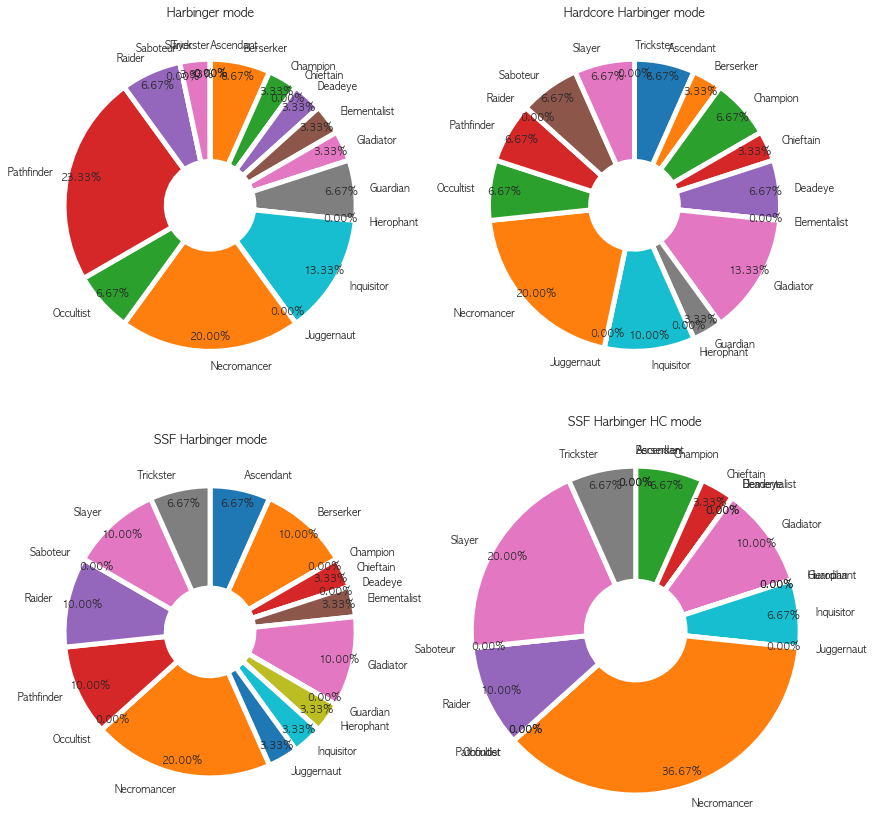

In [47]:
# make for repeatation for visualization
df_30pi = df[df['rank'] <=30].pivot_table(columns = 'ladder', index = 'class',
                                aggfunc = 'count', fill_value = 0)['id'] / 30*100
# ratio list making : each ladder
ratio_list = []
for i in list(df_30pi.columns):
    ratio = df_30pi[i]
    ratio_list.append(ratio)

# use ratio and labels to plt code
labels = df_30pi.index
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
fig, ax = plt.subplots(2, 2, squeeze=True, figsize = (12, 12))
plt.subplot(2,2,1)
plt.pie(ratio_list[0], labels=labels, autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)
plt.subplot(2,2,2)
plt.pie(ratio_list[1], labels=labels, autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)
plt.subplot(2,2,3)
plt.pie(ratio_list[2], labels=labels, autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)
plt.subplot(2,2,4)
plt.pie(ratio_list[3], labels=labels, autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)

# set the each pie chart title
ax[0, 0].set_title("{} mode".format(list(df_30pi.columns)[0]))
ax[0, 1].set_title("{} mode".format(list(df_30pi.columns)[1]))
ax[1, 0].set_title("{} mode".format(list(df_30pi.columns)[2]))
ax[1, 1].set_title("{} mode".format(list(df_30pi.columns)[3]))
fig.tight_layout()
plt.axis('equal')
plt.show()

This poor chart took a quite long time. I wanted to delete the 0% (don't need information) classes but...

Necromancers take 20% in the top 30 except SSF Harbinger HC mode.  
In SSF Harbinger HC mode, Necromancers take 36.67% in the top 30. 


## 3-2. not care of stream 
---

### the Necromancers (graph 3-2)

In [48]:
# define

df_Nec = df[(df['class'] == 'Necromancer')]
df_Nec30 = df_Nec[df_Nec['rank']<=30]

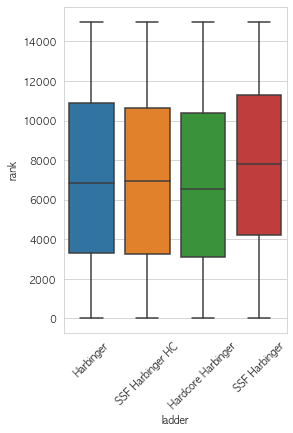

In [49]:
# Necromancers rank boxplot by ladder 

plt.figure(figsize=(4,6))
plt.xticks(rotation=45, fontsize=10)
sns.boxplot(data = df_Nec, x = 'ladder', y = 'rank')
plt.show()

In [50]:
# All Necromancers number by ladder

df_Nec.groupby('ladder')['id'].count()

ladder
Harbinger             1207
Hardcore Harbinger    2099
SSF Harbinger         1716
SSF Harbinger HC      2055
Name: id, dtype: int64

In [51]:
# Necromancers number Who are in top 30 by ladder

df_Nec30.groupby('ladder')['id'].count()

ladder
Harbinger              6
Hardcore Harbinger     6
SSF Harbinger          6
SSF Harbinger HC      11
Name: id, dtype: int64

And make sure there is no problem with `df_Nec30`.

In [52]:
# Necromancers Who are in top 30 by ladder unique values

df_Nec30.groupby(by = 'ladder').nunique()

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch
ladder,,,,,,,,,,,
Harbinger,6,1,1,6,1,1,6,1,6,4,6
Hardcore Harbinger,6,1,1,6,1,1,6,1,6,6,5
SSF Harbinger,6,1,1,6,3,1,6,4,6,5,2
SSF Harbinger HC,11,2,2,11,3,1,11,6,11,9,7


### 3-2-1. percentage of the top 30 Necromancer among 'the all Necromancers'

In [53]:
# Necromancers Who are in top 30 among all Necromancers by ladder

df_Nec30.groupby('ladder')['id'].count() / df_Nec.groupby('ladder')['id'].count() * 100

ladder
Harbinger            0.50
Hardcore Harbinger   0.29
SSF Harbinger        0.35
SSF Harbinger HC     0.54
Name: id, dtype: float64

### 3-2-2. percentage of the top 30 Necromancer among 'the all characters'

In [54]:
# Necromancers who are in top 30 among all characters by ladder

df_Nec30.groupby('ladder')['id'].count() / df.groupby('ladder')['id'].count() * 100

ladder
Harbinger            0.04
Hardcore Harbinger   0.04
SSF Harbinger        0.04
SSF Harbinger HC     0.07
Name: id, dtype: float64

In [55]:
type(df_Nec30.groupby('ladder')['id'].count() / df.groupby('ladder')['id'].count() * 100)

pandas.core.series.Series

### 3-2-3 percentage of each class's top 30 characters among each class (graph 3-3)
" classes who are in top 30 among all class-itself by ladder "

If you select a particular class, what is the probability that the particular class will be in the top 30?  
I want to get the number of 'the class' in the top 30 and the number of all 'the classes'. (like 3-2-1.)

In [56]:
# classes who are in top 30 among each classes by ladder
# we exceptd the classes what is not in top30

classes = list(df[df['rank'] <= 30]['class'].unique())

for i in classes:
    df_bin = df[df['class'] == i]
    df_bin30 = df_bin[df_bin['rank']<=30]
    ser = df_bin30.groupby('ladder')['id'].count() / df_bin.groupby('ladder')['id'].count() * 100
    print("# {} : top 30 ratio(%) in each class by ladder".format(i))
    print(ser)
    print("==========================================")
    if i == classes[0]:
        ser1 = ser
    elif i == classes[1]:
        ser2 = ser
        concatingdf = pd.concat([ser1, ser2], axis=1, ignore_index=True)
    else:
        ser2 = ser
        concatingdf = pd.concat([concatingdf, ser2], axis=1, ignore_index=True)

# Necromancer : top 30 ratio(%) in each class by ladder
ladder
Harbinger            0.50
Hardcore Harbinger   0.29
SSF Harbinger        0.35
SSF Harbinger HC     0.54
Name: id, dtype: float64
# Slayer : top 30 ratio(%) in each class by ladder
ladder
Harbinger            0.06
Hardcore Harbinger   0.15
SSF Harbinger        0.23
SSF Harbinger HC     0.53
Name: id, dtype: float64
# Deadeye : top 30 ratio(%) in each class by ladder
ladder
Harbinger            1.27
Hardcore Harbinger   1.20
SSF Harbinger         NaN
SSF Harbinger HC      NaN
Name: id, dtype: float64
# Gladiator : top 30 ratio(%) in each class by ladder
ladder
Harbinger            0.15
Hardcore Harbinger   0.29
SSF Harbinger        0.23
SSF Harbinger HC     0.19
Name: id, dtype: float64
# Inquisitor : top 30 ratio(%) in each class by ladder
ladder
Harbinger            0.72
Hardcore Harbinger   0.36
SSF Harbinger        0.11
SSF Harbinger HC     0.19
Name: id, dtype: float64
# Raider : top 30 ratio(%) in each class by ladder
l

In [57]:
concatingdf.columns

RangeIndex(start=0, stop=18, step=1)

And the `concatingdf`, which was made during running the 'for'repeatation, has each class ratio, so we unbox this to a normal data frame.

Then, rename the columns by listing` classes`.   

_Of course, there is a more simple solution with rename, I know, but I made the code for `dictionary`.  
I have to practice repeating comprehension and usage for later._


In [58]:
# reset index and rename with a dictionary what we made
concatingdf.reset_index(drop = False, inplace = True)

dictionary = dict()
for i in range(0, 18):
    dictionary[i] = classes[i]

concatingdf.rename(columns = dictionary, inplace = True)
concatingdf

,ladder,Necromancer,Slayer,Deadeye,Gladiator,Inquisitor,Raider,Champion,Occultist,Pathfinder,Elementalist,Chieftain,Hierophant,Ascendant,Trickster,Guardian,Berserker,Juggernaut,Saboteur
0,Harbinger,0.50,0.06,1.27,0.15,0.72,0.10,0.79,1.32,0.20,0.52,NaN,NaN,NaN,NaN,0.57,0.07,NaN,NaN
1,Hardcore Harbinger,0.29,0.15,1.20,0.29,0.36,NaN,0.41,0.66,0.48,NaN,0.14,NaN,0.17,NaN,0.15,0.05,NaN,0.66
2,SSF Harbinger,0.35,0.23,NaN,0.23,0.11,0.20,NaN,NaN,1.27,0.18,0.22,0.18,0.20,0.21,NaN,0.13,0.23,NaN
3,SSF Harbinger HC,0.54,0.53,NaN,0.19,0.19,0.36,0.59,NaN,NaN,NaN,0.14,NaN,NaN,0.19,NaN,NaN,NaN,NaN


In [59]:
# and transpose the dataframe to look good.

top30cla = concatingdf.transpose()
top30cla.reset_index(drop = False, inplace = True)
top30cla.rename(columns = top30cla.iloc[0], inplace = True)
top30cla = top30cla.drop(top30cla.index[0])
top30cla.reset_index(drop = True, inplace = True)
top30cla.rename(columns = {'ladder':'class'}, inplace = True)
top30cla

,class,Harbinger,Hardcore Harbinger,SSF Harbinger,SSF Harbinger HC
0,Necromancer,0.50,0.29,0.35,0.54
1,Slayer,0.06,0.15,0.23,0.53
2,Deadeye,1.27,1.20,NaN,NaN
3,Gladiator,0.15,0.29,0.23,0.19
4,Inquisitor,0.72,0.36,0.11,0.19
5,Raider,0.10,NaN,0.20,0.36
6,Champion,0.79,0.41,NaN,0.59
7,Occultist,1.32,0.66,NaN,NaN
8,Pathfinder,0.20,0.48,1.27,NaN
9,Elementalist,0.52,NaN,0.18,NaN


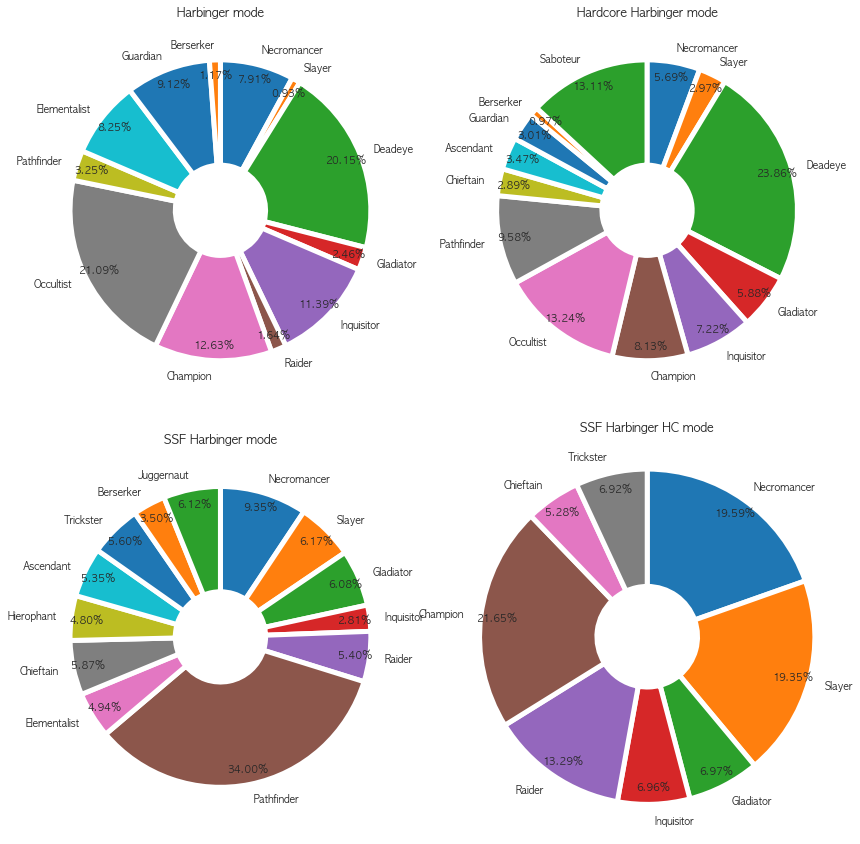

In [60]:
# visualization (graph 3-3)
# There's some null so I had to each ladder partialy

# percentage list making : each ladde
Har_top30 = top30cla[top30cla['Harbinger'].isna() == False][['class', 'Harbinger']]
HarHC_top30 = top30cla[top30cla['Hardcore Harbinger'].isna() == False][['class', 'Hardcore Harbinger']]
SSFHar_top30 = top30cla[top30cla['SSF Harbinger'].isna() == False][['class', 'SSF Harbinger']]
SSFHarHC_top30 = top30cla[top30cla['SSF Harbinger HC'].isna() == False][['class', 'SSF Harbinger HC']]

# use percentages and labels to plt code
# labels = top30cla.index
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
fig, ax = plt.subplots(2, 2, squeeze=True, figsize = (12, 12))
plt.subplot(2,2,1)
plt.pie(Har_top30['Harbinger'], labels=Har_top30['class'], autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)
plt.subplot(2,2,2)
plt.pie(HarHC_top30['Hardcore Harbinger'], labels=HarHC_top30['class'], autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)
plt.subplot(2,2,3)
plt.pie(SSFHar_top30['SSF Harbinger'], labels=SSFHar_top30['class'], autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)
plt.subplot(2,2,4)
plt.pie(SSFHarHC_top30['SSF Harbinger HC'], labels=SSFHarHC_top30['class'], autopct='%.2f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.9)

# set the each pie chart title
ax[0, 0].set_title("{} mode".format(Har_top30.columns[1]))
ax[0, 1].set_title("{} mode".format(HarHC_top30.columns[1]))
ax[1, 0].set_title("{} mode".format(SSFHar_top30.columns[1]))
ax[1, 1].set_title("{} mode".format(SSFHarHC_top30.columns[1]))
fig.tight_layout()
plt.axis('equal')
plt.show()

I thought, then, this can be used for setting values to predict with machine learning.

## 3-3. care of stream
---
### distribution of streaming

How much is streaming involved in the rank? We have to think about the relationship between columns. 

I think we should be noted that broadcasting itself does not affect the rank.  
Just because he's on the streaming doesn't mean he's doing better.  
In other words, some people just stream, and many people don't broadcast games and just play them.

But the questioner wanna know regarding 'streaming' meaning.   
Since it is not expected to be directly related to the rank, I will check it with the correlation coefficient.  

In [61]:
# make a twitch column with streaming.

df['stream'] = np.where(df['twitch'].isna(), 0, 1)

In [62]:
# get the correlation

df.corr()

,rank,dead,online,level,experience,challenges,stream
rank,1.00,0.04,-0.04,-0.45,-0.43,-0.26,-0.06
dead,0.04,1.00,-0.09,-0.33,-0.31,-0.21,0.03
online,-0.04,-0.09,1.00,0.08,0.11,0.06,-0.01
level,-0.45,-0.33,0.08,1.00,0.92,0.60,0.10
experience,-0.43,-0.31,0.11,0.92,1.00,0.66,0.11
challenges,-0.26,-0.21,0.06,0.60,0.66,1.00,0.19
stream,-0.06,0.03,-0.01,0.10,0.11,0.19,1.00


/Users/Angela/opt/anaconda3/envs/py3_8_5/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/Angela/opt/anaconda3/envs/py3_8_5/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


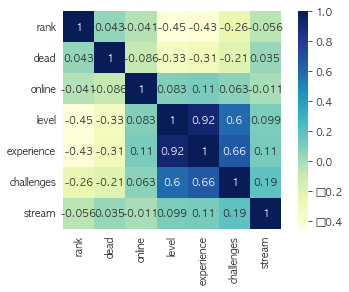

In [63]:
plt.rcParams["figure.figsize"] = (6, 4)
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu", square = True)
plt.show()

It doesn't seem to have many relationships with it.  

So I get the numbers for the Necromancers, just like the above methods.

### the Necromancers who is streaming

In [64]:
# set dataframes of Necromancers who's twitch column is not null.

df_NecTw = df_Nec[df_Nec['twitch'].isnull()==False]
df_NecTw30 = df_NecTw[df_NecTw['rank']<=30]

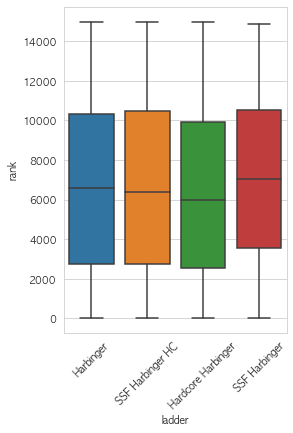

In [65]:
# Necromancers with stream rank boxplot by ladder

plt.figure(figsize=(4,6))
plt.xticks(rotation=45, fontsize=10)
sns.boxplot(data = df_NecTw, x = 'ladder', y = 'rank')
plt.show()

In [66]:
# All Necromancers by ladder - with stream

df_NecTw.groupby('ladder')['id'].count()

ladder
Harbinger             374
Hardcore Harbinger    765
SSF Harbinger         307
SSF Harbinger HC      556
Name: id, dtype: int64

In [67]:
# Necromancers Who are in top 30 by ladder - with stream

df_NecTw30.groupby('ladder')['id'].count()

ladder
Harbinger             6
Hardcore Harbinger    5
SSF Harbinger         2
SSF Harbinger HC      7
Name: id, dtype: int64

### 3-3-1. ratio the top 30 Necromancer(streaming) among 'the all Necromancers'

In [68]:
# Streaming Necromancers Who are in top 30 among all Necromancers by ladder

df_NecTw30.groupby('ladder')['id'].count() / df_Nec.groupby('ladder')['id'].count() * 100

ladder
Harbinger            0.50
Hardcore Harbinger   0.24
SSF Harbinger        0.12
SSF Harbinger HC     0.34
Name: id, dtype: float64

### 3-3-2. ratio the top 30 Necromancer(streaming) among 'the all Necromancers(streaming)'

In [69]:
# Streaming Necromancers who are in top 30 among all streaming Necromancers by ladder

df_NecTw30.groupby('ladder')['id'].count() / df_NecTw.groupby('ladder')['id'].count() * 100

ladder
Harbinger            1.60
Hardcore Harbinger   0.65
SSF Harbinger        0.65
SSF Harbinger HC     1.26
Name: id, dtype: float64

### 3-3-3. ratio the top 30 Necromancer(streaming) among 'the all characters'

In [70]:
# Streaming Necromancers who are in top 30 among all characters by ladder

df_NecTw30.groupby('ladder')['id'].count() / df.groupby('ladder')['id'].count() * 100

ladder
Harbinger            0.04
Hardcore Harbinger   0.03
SSF Harbinger        0.01
SSF Harbinger HC     0.05
Name: id, dtype: float64

### 3-3-4. ratio the top 30 Necromancers(streaming) among 'the all characters(streaming)'

In [71]:
# Streaming Necromancers who are in top 30 among all streaming characters by ladder

df_NecTw30.groupby('ladder')['id'].count() / df[df['twitch'].isna() != False].groupby('ladder')['id'].count() * 100

ladder
Harbinger            0.06
Hardcore Harbinger   0.05
SSF Harbinger        0.02
SSF Harbinger HC     0.06
Name: id, dtype: float64

세 가지로 나누어 총 8가지로 보려고 한다. 물론 이 여부를 더미 변수 처리 해서 머신러닝을 돌릴 수도 있을 것 같긴 하다.

1. Tw 하는 혹은 안하는  
2. 전체 혹은 전체 NEC 중  
3. Tw 하는 혹은 안하는 (top 30인 NEC)

나눌 것.

### 3-3-5 ratio the top 30 of each streaming class among each class 
" streaming classes who are in top 30 among all class-itself by ladder "


# 4. The average number of "finished" challenges 
---
##### Q4. The average number of finished challenges for each division shows the division with the highest and lowest average challenges.

This question is really clear, thankfully.  
I'll separate the division and calculate the average challenges.  


In [77]:
# simple max and min
df.groupby(by = 'ladder')[['challenges']].agg(['max', 'min'])

challenges    
                          max min
ladder                           
Harbinger                  40  13
Hardcore Harbinger         40   8
SSF Harbinger              40   9
SSF Harbinger HC           40   4

In [82]:
# average challenges by each ladder
df.groupby(by = 'ladder')[['challenges']].mean()

,challenges
ladder,
Harbinger,33.47
Hardcore Harbinger,27.17
SSF Harbinger,22.15
SSF Harbinger HC,20.29


# 5. Is the class of the dead characters related to level?
---
##### Q5. Show dependency between level and class of dead characters. Only for HC divisions.

The dead column has a mean in only hardcore modes.  
That means the goal of the hardcore mode is survival with the best playing, and maybe alive characters can restart or continue the game.  

I understood the question as the relation between the dead characters' class and the level.  
Because we can think that the death is related just level(user's ability) or maybe the class is the problem.

If there is a dependency between level and class, we can treat that some particular class is **prefered** because of the difficulty or something like that,  
or 

The methods which can get the dependency,  
    1. correlation between level and class.  
    2. ANOVA analysis with each class.  


## ratio of dead characters

In [91]:
df_hc = df.loc[df['ladder'].isin(['SSF Harbinger HC', 'Hardcore Harbinger'])]

In [92]:
df_hc.pivot_table(index = 'ladder', values = 'dead')

,dead
ladder,
Hardcore Harbinger,0.63
SSF Harbinger HC,0.74


In [ ]:
# dead
df_hc.loc[df['dead']]